### Base Learner 9  - Use WeightedDL
Can we get better perf on pieces we over-weight?

In [1]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [2]:
def my_weight_func(it_path):
    return 3 if 'queen' in it_path.name else 1

In [3]:
my_params = {'_train_seed':0, '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50,
            '_train_path':train_clean_path,
            '_learn_norm': False,
             '_weighted_dl': True, 
             '_weight_func': my_weight_func,
             
            }
default_params.update(my_params)

In [4]:
set_seed(42)

In [5]:
train_dl, learn = run_exp(default_params, 'dummy', b_ret=True,)

In [6]:
set_seed(42)
with learn.no_logging(): learn.fit_one_cycle(10)

### Interpret and Compare

In [7]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,1.710588,0.442982,0.907895,0.500000
1,1.444388,0.583333,0.942982,0.635965
2,1.190004,0.640351,0.964912,0.692982
3,1.281303,0.649123,0.942982,0.710526
4,1.088127,0.692982,0.951754,0.732456
5,1.043168,0.719298,0.973684,0.780702
6,1.099344,0.710526,0.951754,0.763158
7,0.921677,0.741228,0.951754,0.802632
8,0.907662,0.758772,0.964912,0.811404
9,0.930722,0.736842,0.960526,0.793860


In [8]:
learn.cbs.pop(3)

TestSetRecorder

              precision    recall  f1-score   support

black-bishop       0.87      0.93      0.90        14
  black-king       0.75      0.55      0.63        11
black-knight       0.73      0.92      0.81        12
  black-pawn       0.89      1.00      0.94        16
 black-queen       0.73      0.62      0.67        13
  black-rook       0.92      1.00      0.96        12
white-bishop       0.58      0.58      0.58        12
  white-king       0.82      0.64      0.72        14
white-knight       0.74      0.93      0.82        15
  white-pawn       0.61      0.93      0.74        15
 white-queen       0.83      0.36      0.50        14
  white-rook       0.82      0.64      0.72        14

    accuracy                           0.77       162
   macro avg       0.77      0.76      0.75       162
weighted avg       0.78      0.77      0.75       162



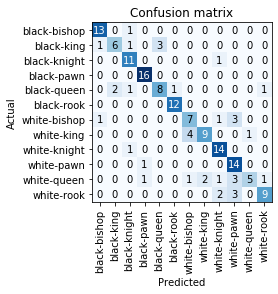

In [9]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

### More fitting

In [10]:
with learn.no_logging(): learn.fine_tune(20)

              precision    recall  f1-score   support

black-bishop       1.00      0.79      0.88        14
  black-king       0.90      0.82      0.86        11
black-knight       0.80      1.00      0.89        12
  black-pawn       1.00      0.88      0.93        16
 black-queen       0.75      0.69      0.72        13
  black-rook       0.67      1.00      0.80        12
white-bishop       1.00      0.83      0.91        12
  white-king       1.00      0.93      0.96        14
white-knight       0.94      1.00      0.97        15
  white-pawn       0.94      1.00      0.97        15
 white-queen       1.00      1.00      1.00        14
  white-rook       1.00      0.93      0.96        14

    accuracy                           0.91       162
   macro avg       0.92      0.91      0.90       162
weighted avg       0.92      0.91      0.91       162



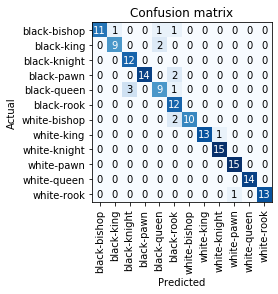

In [11]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

### Previous work in non-weighted DL `base-learner-7`

In [6]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,1.642789,0.500000,0.929825,0.557018
1,1.427014,0.627193,0.916667,0.710526
2,1.135178,0.675439,0.951754,0.719298
3,1.033293,0.692982,0.960526,0.750000
4,1.036367,0.706140,0.969298,0.758772
5,0.925820,0.736842,0.973684,0.780702
6,0.924357,0.732456,0.960526,0.776316
7,0.836314,0.741228,0.973684,0.780702
8,0.866296,0.732456,0.969298,0.776316
9,0.846266,0.741228,0.969298,0.789474


In [14]:
learn.cbs.pop(3)

TestSetRecorder

              precision    recall  f1-score   support

black-bishop       0.85      0.79      0.81        14
  black-king       0.83      0.91      0.87        11
black-knight       0.80      1.00      0.89        12
  black-pawn       0.84      1.00      0.91        16
 black-queen       1.00      0.31      0.47        13
  black-rook       0.71      1.00      0.83        12
white-bishop       0.59      0.83      0.69        12
  white-king       0.73      0.79      0.76        14
white-knight       0.88      0.93      0.90        15
  white-pawn       0.88      0.93      0.90        15
 white-queen       1.00      0.21      0.35        14
  white-rook       0.80      0.86      0.83        14

    accuracy                           0.80       162
   macro avg       0.82      0.80      0.77       162
weighted avg       0.83      0.80      0.77       162



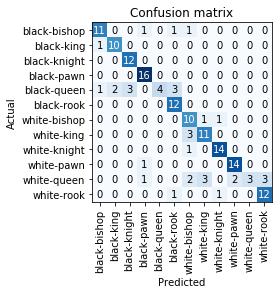

In [15]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

##### Save

In [ ]:
old_path = learn.path
learn.path = Path('../models')
learn.export('base-learner7-fit10.pkl')
learn.path = old_path

In [ ]:
old_path

In [ ]:
len(easy_test_dl.items)

In [ ]:
162/12